<a href="https://colab.research.google.com/github/ttsuneoka/GoogleColab/blob/master/PythonDataScienceHandbook5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


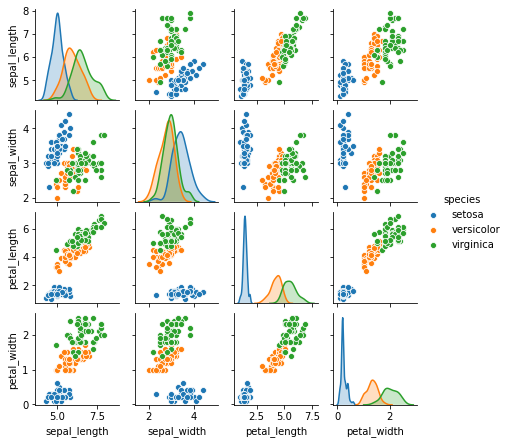

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set
sns.pairplot(iris, hue='species', size=1.5);

In [ ]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [ ]:
y_iris = iris['species']
y_iris.shape

(150,)

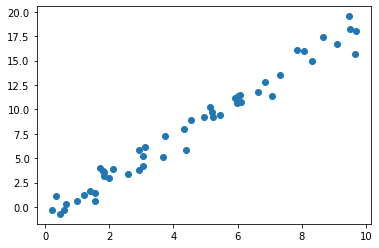

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [ ]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([1.9776566])

In [ ]:
model.intercept_

-0.9033107255311146

In [ ]:
xfit = np.linspace(-1, 11)

In [ ]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

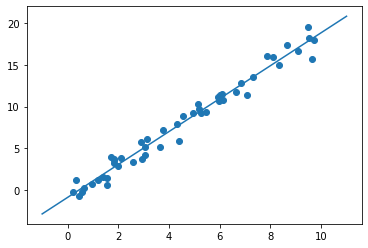

In [ ]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB #1. choose model class
model = GaussianNB()                       #2. instantiate model
model.fit(Xtrain, ytrain)                  #3. fit model to data
y_model = model.predict(Xtest)             #4. predict on new data

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [ ]:
from sklearn.decomposition import PCA  #1. choose model class
model = PCA(n_components=2)            #2. Instantiate model with hyperparameters
model.fit(X_iris)                      #3. fit model to data
X_2D = model.transform(X_iris)         #4. Transform the data to two dimensions

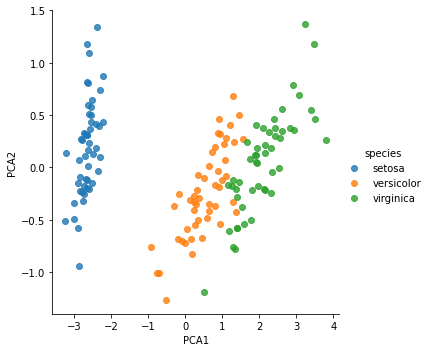

In [ ]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

In [ ]:
from sklearn.mixture import GaussianMixture                      #1. choose model class
model = GaussianMixture(n_components=3, covariance_type='full')  #2. Instantiate model with hyperparameters
model.fit(X_iris)                                                #3. Fit model to data
y_gmm = model.predict(X_iris)                                    #4. Determine cluster labels

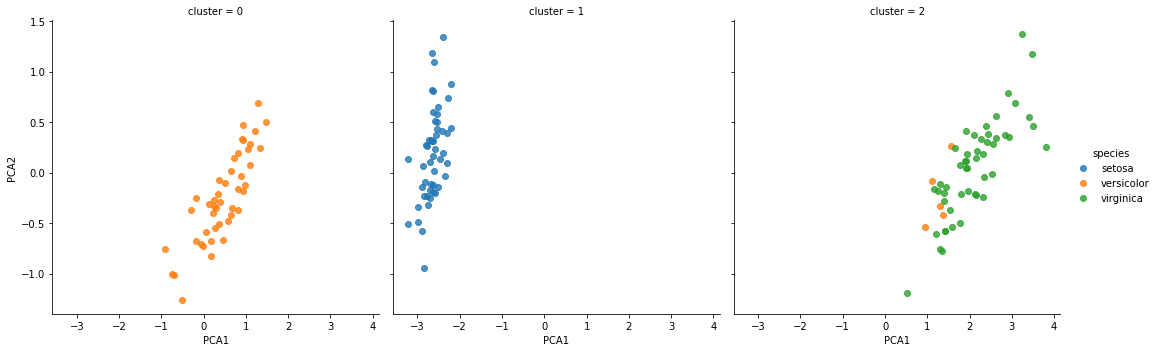

In [ ]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

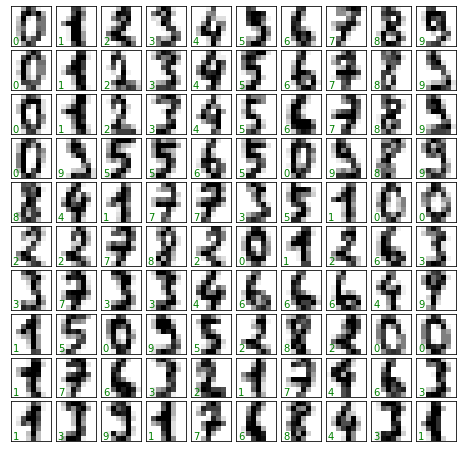

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [ ]:
X = digits.data
X.shape

(1797, 64)

In [ ]:
y = digits.target
y.shape

(1797,)